<a href="https://colab.research.google.com/github/Abdelmounim1996/Distributed-Learning-of-Finite-Gaussian-Mixtures/blob/main/GMR_GMMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Abdelmounim1996/Distributed-Learning-of-Finite-Gaussian-Mixtures


Cloning into 'Distributed-Learning-of-Finite-Gaussian-Mixtures'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 113 (delta 42), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (113/113), 2.17 MiB | 6.06 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls '/content/Distributed-Learning-of-Finite-Gaussian-Mixtures/mylib/GMR_GMMs.py'

/content/Distributed-Learning-of-Finite-Gaussian-Mixtures/mylib/GMR_GMMs.py


In [4]:
!cat '/content/Distributed-Learning-of-Finite-Gaussian-Mixtures/mylib/GMR_GMMs.py'

import numpy as np
from scipy.stats import multivariate_normal
import time
from scipy import linalg
"""machaine learning  library"""
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql import SparkSession
from pyspark.rdd import RDD
from pyspark.mllib.linalg import  DenseVector , DenseMatrix , _convert_to_vector
from pyspark.mllib.common import callMLlibFunc
import array as pyarray
# library mathematic & statistic 
import numpy as np
import time 
from scipy.stats import multivariate_normal
from scipy import linalg
from numpy.linalg import multi_dot
#from sklearn.mixture.base import BaseMixture, _check_shape
from sklearn.utils import check_array, check_random_state
# library for machine learning
from sklearn.cluster import KMeans
np.seterr(divide='ignore', invalid='ignore')
spark = SparkSession.builder.master("local[*]") \
                    .appName('Distributed Learning of Finite Gaussian Mixtu

In [16]:
import sys
import numpy as np
sys.path.append('/content/Distributed-Learning-of-Finite-Gaussian-Mixtures')

In [6]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 40 kB/s 
     |████████████████████████████████| 198 kB 61.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=d76eefb9efbf86692368872dd911b8f44193d12f1f77417b01ff56ac1d5e7617
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [7]:
from mylib.GMR_GMMs import Gaussian_mixture_reduction_GMMs

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


n_samples = 10000
dim = 2
k = 10
X, y_true = make_blobs(n_samples=n_samples,
                       n_features = dim , centers=k,
                       cluster_std=0.5,
                       random_state=0)

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]") \
                    .appName('Distributed Learning of Finite Gaussian Mixtures') \
                    .getOrCreate()
sc = spark.sparkContext


data_make = sc.parallelize(X , 4 )

In [9]:
%%time
model = Gaussian_mixture_reduction_GMMs(k).fit(data_make , 1)

sys time :  2.12044620513916
---->batch=0, time(s)=1.3
getting distributed parametres in : 1.3142280578613281 seconds
iters :  0
KL distance time : 0.005702972412109375 seconds 
update params MM algorithm time : 0.0025391578674316406 seconds 
iters :  1
KL distance time : 0.006154775619506836 seconds 
update params MM algorithm time : 0.001600503921508789 seconds 
iters :  2
KL distance time : 0.009776592254638672 seconds 
update params MM algorithm time : 0.001110076904296875 seconds 
getting aggregate parameters in : :  0.21703004837036133 seconds 
CPU times: user 296 ms, sys: 168 ms, total: 464 ms
Wall time: 3.71 s


In [10]:
%%time
labels = model.predict(data_make)

CPU times: user 37.6 ms, sys: 9.75 ms, total: 47.3 ms
Wall time: 3 s


In [11]:
labels= model.predict(data_make)

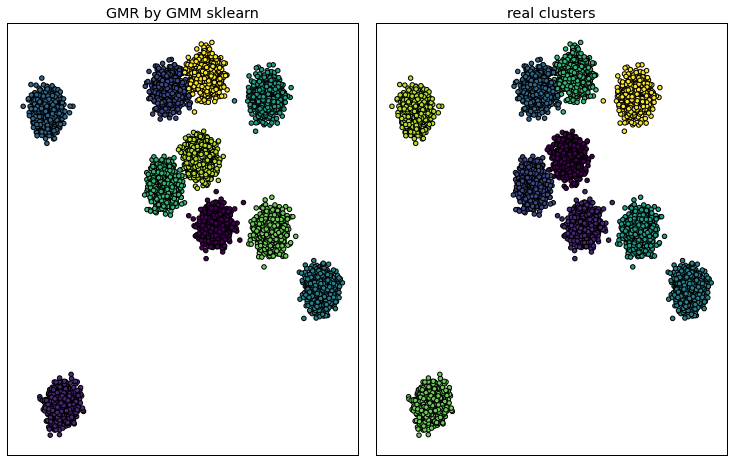

In [12]:
fig = plt.figure(figsize=(10, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1 , hspace=0.1, wspace=0.05)
import matplotlib.pyplot as plt

style = ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast',
 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 
 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 
 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
h =  3
L = [ 'GMR by GMM sklearn', 'real clusters']
Lab = [labels  , y_true]
plt.style.use(style[h])
for i in range(2):
    ax = fig.add_subplot(1, 2, i + 1, xticks=[], yticks=[])
    ax.scatter( X[:, 0] , X[:, 1] , c = Lab[i] , cmap= 'viridis' )
    ax.set_title(L[i])

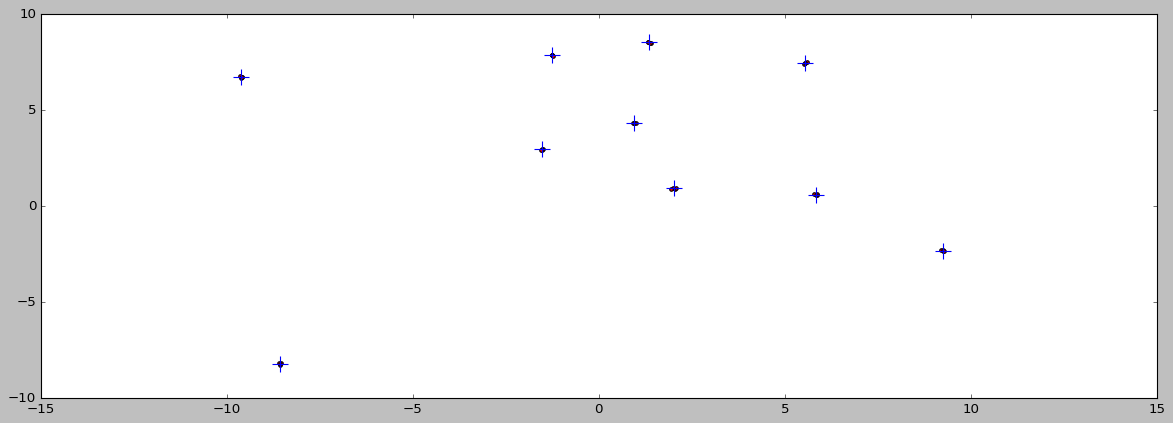

In [13]:
"""Means """
fig = plt.figure(figsize=(18,6))
plt.scatter(model.AVG_means[:,0],model.AVG_means[:,1], s=10, c="red")
plt.scatter(model.Means[:,0], model.Means[:,1] , s =200 , c ="blue" , marker='+')
plt.show()

In [14]:
""" Loading file library """
import urllib.request
DATA_PATH=""
f = urllib.request.urlretrieve("https://www.math.univ-toulouse.fr/~besse/Wikistat/data/mnist_train.csv",DATA_PATH+"mnist_train.csv")
f = urllib.request.urlretrieve("https://www.math.univ-toulouse.fr/~besse/Wikistat/data/mnist_test.csv",DATA_PATH+"mnist_test.csv")

In [17]:
trainRDD = sc.textFile(DATA_PATH+"mnist_train.csv"  ).map(lambda l: [float(x) for x in l.split(',')])

trainRDD  = trainRDD.map(lambda x: np.array(x[:-1])+ np.random.normal(0.,0.05, 784 ) ,4 ) 
print("shape trainRDD : ( ",trainRDD.count() ,",", len(trainRDD.first()) , ")")

shape trainRDD : (  60000 , 784 )


In [ ]:
%%time
model = Gaussian_mixture_reduction_GMMs(10).fit(trainRDD , 2 )

sys time :  22.0635883808136
---->batch=0, time(s)=101.7
---->batch=1, time(s)=149.2
getting distributed parametres in : 251.08133506774902 seconds


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


iters :  0
KL distance time : 0.017755508422851562 seconds 
update params MM algorithm time : 0.4485621452331543 seconds 
iters :  1
